In [1]:
import pandas as pd
from src.online_learning.change_detection.cluster_estimation import cluster_estimation
from src.online_learning.cluster import Cluster
from notebooks.online_learning.utils.plotting_utils import threed_scatter
import numpy as np
import matplotlib.pyplot as plt

## nominal clusters dataframe

In [2]:
df_phi_0 = pd.read_csv('../../../adaptation_final_experiment_with_surrogated_data/nominal_cluster/phi_0_kmeans.csv')
df_phi_1 = pd.read_csv('../../../adaptation_final_experiment_with_surrogated_data/nominal_cluster/phi_1_kmeans.csv')
df_phi_2 = pd.read_csv('../../../adaptation_final_experiment_with_surrogated_data/nominal_cluster/phi_2_kmeans.csv')
df_phi_3 = pd.read_csv('../../../adaptation_final_experiment_with_surrogated_data/nominal_cluster/phi_3_kmeans.csv')

In [3]:
df_phi_3.describe()

,Temp,Soc,C_1,R_0,R_1,Cluster
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.0
mean,13.333333,47.777778,8088.639648,0.018434,0.024309,3.0
std,4.952606,31.722063,2850.623631,0.004103,0.010207,0.0
min,10.000000,0.000000,976.466778,0.013612,0.013954,3.0
25%,10.000000,20.000000,6809.928951,0.015858,0.018272,3.0
50%,10.000000,50.000000,7717.072911,0.017717,0.021690,3.0
75%,15.000000,70.000000,9348.786525,0.019670,0.026635,3.0
max,25.000000,100.000000,15552.536417,0.034656,0.070274,3.0


## preprocessing of nominal_cluster

In [4]:
nominal_cluster_3 = df_phi_3.drop(columns=['Temp','Soc','Cluster']).values
nominal_cluster_3_list = [nominal_cluster_3[i, :] for i in range(nominal_cluster_3.shape[0])]
nominal_cluster_2 = df_phi_2.drop(columns=['Temp','Soc','Cluster']).values
nominal_cluster_2_list = [nominal_cluster_2[i, :] for i in range(nominal_cluster_2.shape[0])]
nominal_cluster_1 = df_phi_1.drop(columns=['Temp','Soc','Cluster']).values
nominal_cluster_1_list = [nominal_cluster_1[i, :] for i in range(nominal_cluster_1.shape[0])]
nominal_cluster_0 = df_phi_0.drop(columns=['Temp','Soc','Cluster']).values
nominal_cluster_0_list = [nominal_cluster_0[i, :] for i in range(nominal_cluster_0.shape[0])]

## faulty ground dataframe

In [5]:
df_noisy_fault_on_voltage = pd.read_csv('../../../data/ground/fault_signals/noisy_fault_voltage_ground.csv')

In [6]:
df_noisy_fault_on_voltage.describe()

,time,current,voltage,temperature
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000
mean,5.097484e+05,0.106791,25.999310,313.382627
std,2.943037e+05,19.334477,1.016877,4.861828
min,0.000000e+00,-23.953000,21.919333,299.328949
25%,2.548748e+05,-21.656000,25.333037,309.874074
50%,5.097485e+05,1.041000,26.099632,312.187236
75%,7.646222e+05,16.209000,26.733910,314.665012
max,1.019497e+06,32.551000,30.156232,326.815423


## abrupt experiment dataframe

In [7]:
df_v_optimizer = pd.read_csv('../../../data/output/abrupt/11_09_2024/v_optimizer.csv')
df_history_theta = pd.read_csv('../../../data/output/abrupt/11_09_2024/history_theta.csv')
df_outliers_theta = pd.read_csv('../../../data/output/abrupt/11_09_2024/outliers_set.csv')

In [8]:
# todo: understand why the lenght of v_optimizer is different from the length of voltage input signal !

In [9]:
df_v_optimizer.describe()

,v_optimizer
count,1.480000e+06
mean,inf
std,NaN
min,2.307493e+01
25%,2.613803e+01
50%,2.721528e+01
75%,2.817188e+01
max,inf


In [10]:
inf_present = np.isinf(df_v_optimizer['v_optimizer']).any()
print(f"Infinite values present: {inf_present}")

Infinite values present: True


In [11]:
df_v_optimizer['v_optimizer'].isna().any()

False

In [12]:
df_v_optimizer = df_v_optimizer[~np.isinf(df_v_optimizer['v_optimizer'])]

In [13]:
df_v_optimizer.describe()

,v_optimizer
count,1.402566e+06
mean,inf
std,inf
min,2.307493e+01
25%,2.608266e+01
50%,2.709345e+01
75%,2.804475e+01
max,1.326320e+308


In [14]:
zero_values_present = (df_v_optimizer['v_optimizer'] == 0.0).any()
print(f"Are there any 0.0 values? {zero_values_present}")

Are there any 0.0 values? False


<Axes: >

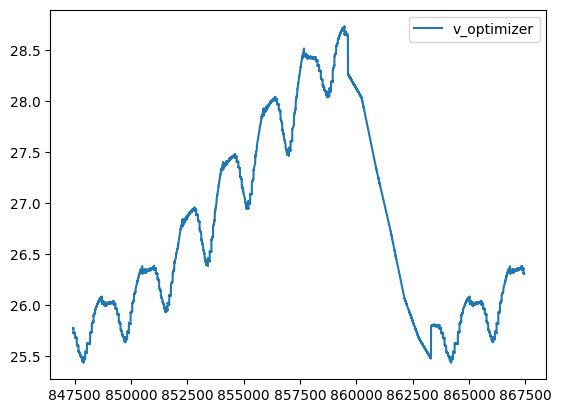

In [15]:
df_v_optimizer.iloc[770000:790000].plot()

<Axes: >

/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


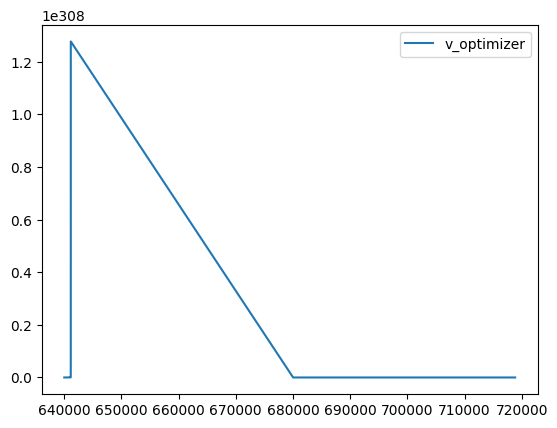

In [16]:
df_v_optimizer.iloc[640000:680000].plot()

In [17]:
df_v_optimizer.iloc[640000:720000].head(20000)

,v_optimizer
640000,28.357301
640001,28.366061
640002,28.381857
640003,28.411005
640004,28.464942
...,...
698852,26.090753
698853,26.086652
698854,26.086358
698855,26.079216


In [18]:
df_v_optimizer.iloc[660000:720000].describe()

,v_optimizer
count,6.000000e+04
mean,inf
std,inf
min,2.531053e+01
25%,2.600300e+01
50%,2.682738e+01
75%,2.791659e+01
max,1.326320e+308


<Axes: >

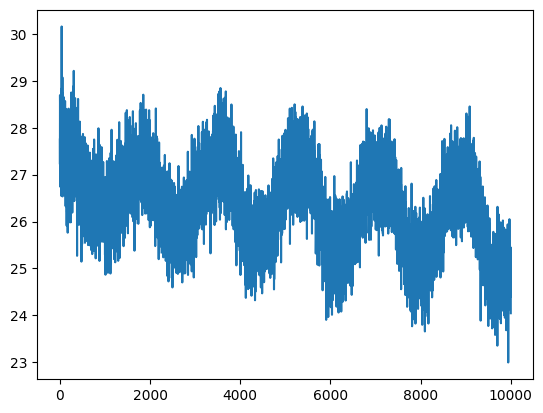

In [19]:
df_noisy_fault_on_voltage['voltage'].iloc[0:10000].plot()

RMK: the thetas come from voltages affected by noise

In [20]:
df_history_theta.describe()

,r0,r1,c
count,37.000000,3.700000e+01,37.000000
mean,-0.015617,3.955971e-05,13472.545168
std,0.020924,1.677902e-04,1272.855667
min,-0.049266,-5.621333e-08,12835.960571
25%,-0.037799,-6.898020e-09,12863.377586
50%,-0.017155,1.699141e-09,12867.013494
75%,0.004345,9.752188e-09,12874.886895
max,0.014243,7.404566e-04,16072.354371


In [21]:
df_outliers_theta.head()

,r0,r1,c
0,-0.037709,2.750777e-08,12872.409918
1,-0.000855,1.699141e-09,16072.354371
2,-0.029638,5.686879e-09,12864.050192
3,-0.015731,-4.833699e-09,12867.013494
4,-0.009382,-6.898020e-09,12865.295767


In [22]:
outliers_set = df_outliers_theta.values

In [23]:
type(outliers_set[6])

numpy.ndarray

In [24]:
print(outliers_set.shape)

(37, 3)


In [25]:
outliers_list = [outliers_set[i, :] for i in range(outliers_set.shape[0])]

In [26]:
type(outliers_list[2])

numpy.ndarray

In [27]:
print(len(outliers_list))

37


## Estimate the cluster 

In [28]:
phi = cluster_estimation(cluster_data_points=nominal_cluster_3_list,outliers=outliers_list)

Len of first PC for cluster datapoints: 54
type of datapoints: <class 'numpy.ndarray'>
shape of datapoints: (54, 1)
Len of first PC for outliers: 37
type of outliers: <class 'numpy.ndarray'>
shape of outliers: (37, 1)
Reject the null hypothesis: Create a new cluster.
len of list of o_tildes 3


/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-24.592442294325679 > -42.850554911820851). You may want to try with a higher value of support_fraction (current value: 0.483).
  warnings.warn(
/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-24.851879677286178 > -44.003526964184672). You may want to try with a higher value of support_fraction (current value: 0.483).
  warnings.warn(
/home/nicola_petkovic/miniconda3/envs/dt-rse/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-24.895477085312415 > -43.695509168022468). You may want to tr

In [29]:
len(phi[1].data_points)

5

In [30]:
print(phi)

[<src.online_learning.cluster.Cluster object at 0x7fb7f0b957f0>, <src.online_learning.cluster.Cluster object at 0x7fb7f0bf7af0>, None]


In [31]:
print(phi[1].data_points.shape)

(5, 3)


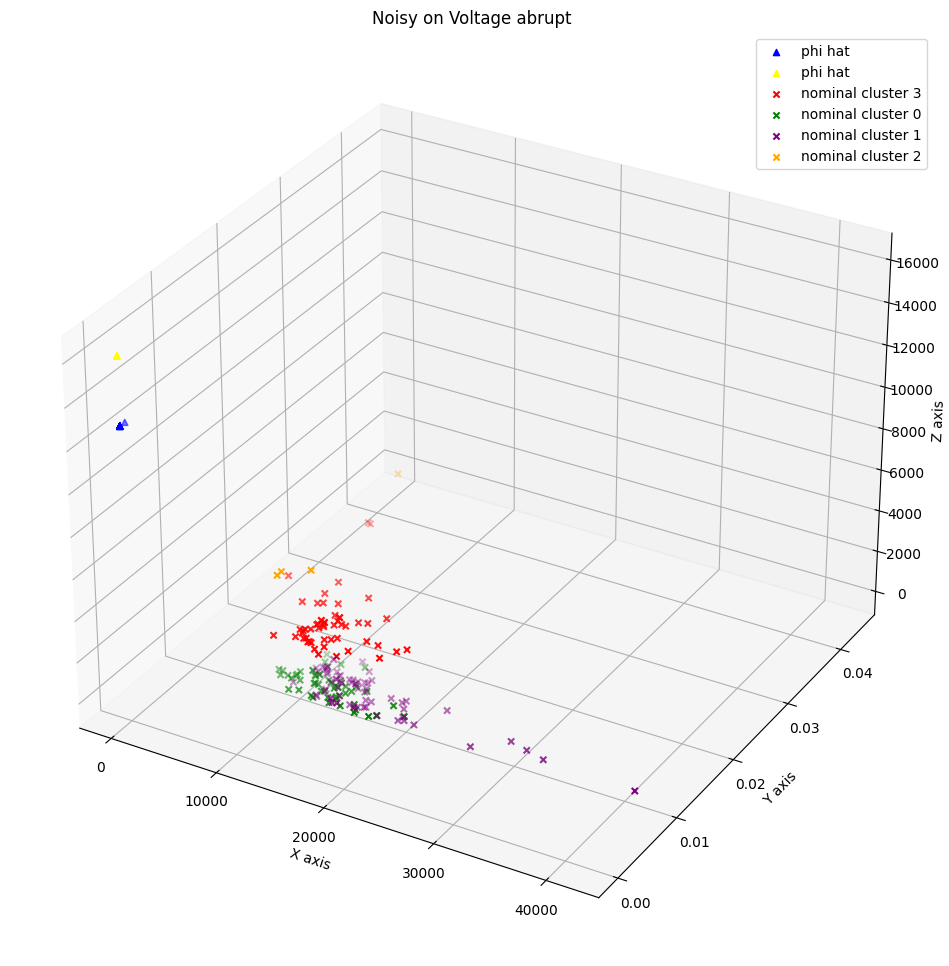

In [32]:
# Convert lists of arrays into 2D arrays for plotting
data1 = np.array(nominal_cluster_3_list)
data2 = np.array(outliers_list)

nom0 = np.array(nominal_cluster_0_list)
nom1 = np.array(nominal_cluster_1_list)
nom2 = np.array(nominal_cluster_2_list)

# Create a figure and 3D axis
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(phi[0].data_points[:, 0], phi[0].data_points[:, 1], phi[0].data_points[:, 2], c='blue', marker='^', label='phi hat')

ax.scatter(phi[1].data_points[:, 0], phi[1].data_points[:, 1], phi[1].data_points[:, 2], c='yellow', marker='^', label='phi hat')

# Plot the data from list1
ax.scatter(data1[:, 0], data1[:, 1], data1[:, 2], c='r', marker='x', label='nominal cluster 3')

# Plot the data from list2
#ax.scatter(data2[:, 0], data2[:, 1], data2[:, 2], c='b', marker='^', label='outliers')

ax.scatter(nom0[:, 0], nom0[:, 1], nom0[:, 2], c='green', marker='x', label='nominal cluster 0')
ax.scatter(nom1[:, 0], nom1[:, 1], nom1[:, 2], c='purple', marker='x', label='nominal cluster 1')
ax.scatter(nom2[:, 0], nom2[:, 1], nom2[:, 2], c='orange', marker='x', label='nominal cluster 2')

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Noisy on Voltage abrupt')

# Add legend
ax.legend()

# Show the plot
plt.show()

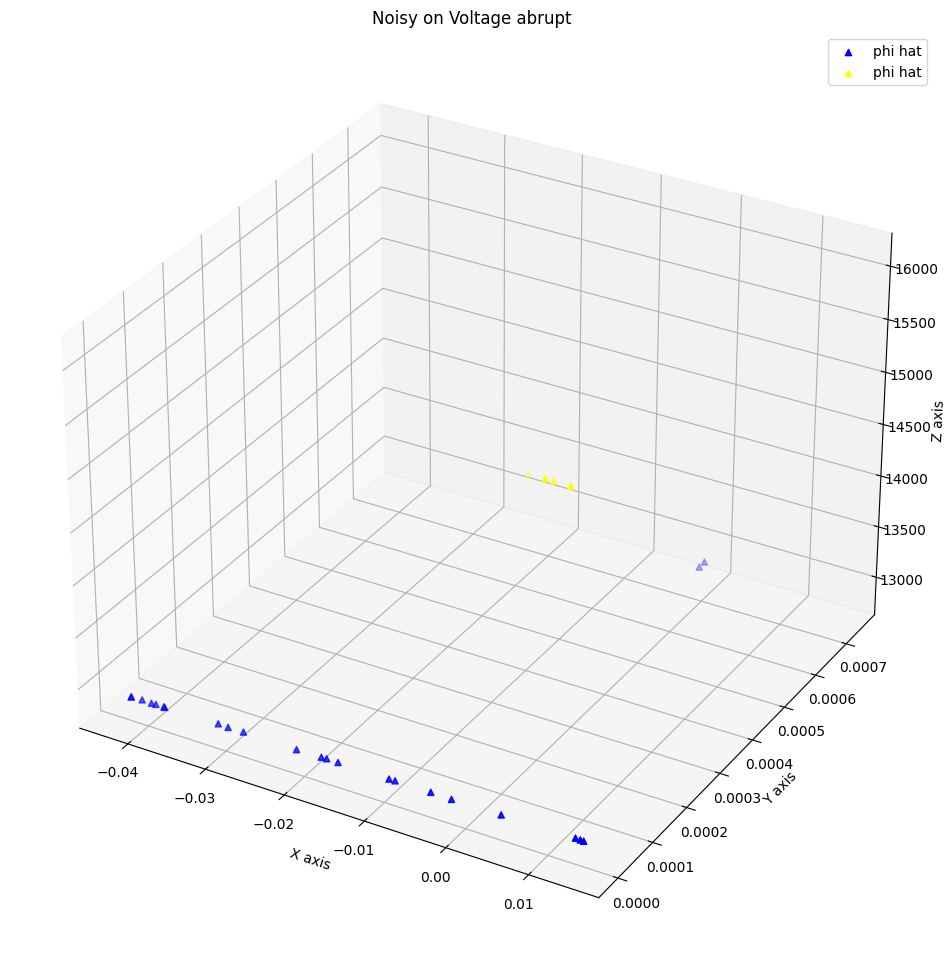

In [33]:
# Create a figure and 3D axis
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(phi[0].data_points[:, 0], phi[0].data_points[:, 1], phi[0].data_points[:, 2], c='blue', marker='^', label='phi hat')

ax.scatter(phi[1].data_points[:, 0], phi[1].data_points[:, 1], phi[1].data_points[:, 2], c='yellow', marker='^', label='phi hat')

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Noisy on Voltage abrupt')

# Add legend
ax.legend()

# Show the plot
plt.show()